# Stochastic Processes
## Practical HW1

### Required imports

In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# You are allowed to use any other library. But note, your notebook must be able to run,
# so it is necessary to add !pip install commands to install the desired libraries.
# You must add any import command here and !pip install here.
!pip install scipy
!pip install sklearn

from scipy import stats
from scipy import spatial
from sklearn.linear_model import LinearRegression

np.seterr(divide='ignore')

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will n

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Gaussian Process

### Fit Gaussian


#### Univariate Gaussian
1. In this section, we just want to fit a univariate Gaussian to the data in `data1.npy`. <br>
2. Plot the samples and the final graph in one graph.

As you know a random variable follows a univariate Gaussian distribution if its probability density function is given 
$$p(x)=\frac{1}{(2\pi\sigma^2)^{1/2}}\text{exp}\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

data1 shape: (2, 15)


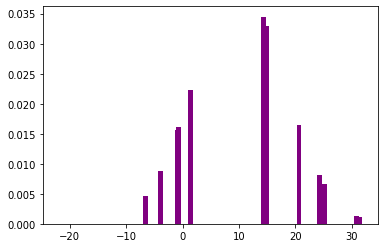

In [2]:
# Load data
data1 = np.load("data1.npy")
print("data1 shape:", data1.shape)

# Plot data
data_x, data_y = data1
plt.bar(data_x, data_y, color="purple")
plt.show()

**We will assume `data_x = data1[0]` is the sample locations on x axis and, and `data_y = data1[1]` is the weight of these samples:**

mu: 10.098532935585112 std: 9.751970081480476


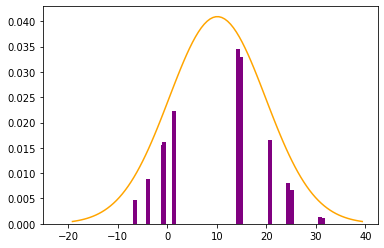

In [3]:
# Calculate mean and std (weighted)
mu = np.average(data_x, weights=data_y)
sigma = np.sqrt(np.average((data_x - mu)**2, weights=data_y))
print("mu:", mu, "std:", sigma)

# Generate x and calculate pdf of a gaussian calculated mean and variance
X = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
Y = stats.norm.pdf(X, mu, sigma)

# Plot samples and the gaussian distribution
plt.bar(data_x, data_y, color="purple")
plt.plot(X, Y, color="orange")
plt.show()

#### Multivariate Gaussian
1. In `data2.npy`, a set of points is stored as $(x_1,x_2)$. Try to fit a two-variable Gaussian to this data points.
2. For this, obtain the mean vector and the covariance matrix of the bivariate Gaussian.

data1 shape: (1000, 2)


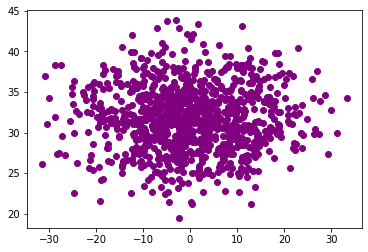

In [4]:
# Load data
data2 = np.load("data2.npy")
print("data1 shape:", data2.shape)

# Plot data
x1, x2 = data2[:,0], data2[:, 1]
plt.scatter(x1, x2, color="purple")
plt.show()

In [5]:
# Calculate mean vector and covariance matrix
mu = np.mean(data2, axis=0)
sigma = np.cov(data2.transpose())
print("mean vector:\n", mu)
print()
print("covariance matrix:\n", sigma)

mean vector:
 [-0.26895121 31.83196193]

covariance matrix:
 [[123.96030401   0.8158547 ]
 [  0.8158547   15.7098274 ]]


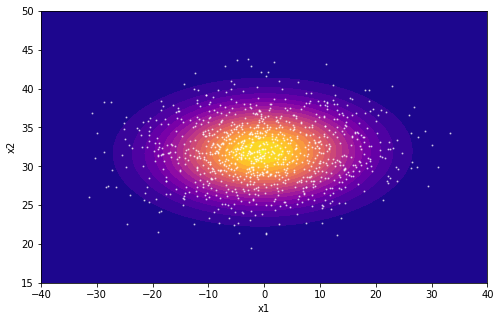

In [6]:
# Create a distribution based on mean and covariance
bivariate_dist = stats.multivariate_normal(cov=sigma, mean=mu)

# Create a mesh grid 
x = np.linspace(-40, 40, num=100)
y = np.linspace(15, 50, num=100)
X, Y = np.meshgrid(x,y)

# Calculate pdf for each point in mesh rid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = bivariate_dist.pdf([X[i,j], Y[i,j]])
 
# Plot contour
plt.figure(figsize=(8, 5))

plt.contourf(X, Y, pdf, cmap='plasma', levels=20)
plt.xlabel("x1")
plt.ylabel("x2")

# Plot data points
plt.scatter(x1, x2, color='white', alpha=0.6, s=1)
plt.show()

### Generate Gaussian Processes
1. Generate 10 Gaussian processes with $\mu(t)=2\log(t)$ and rbf kernel: $e^{-(x_1-x_2)^2/{2\sigma^2}}$ with $\sigma^2$=0.05, in the interval [0,4].
2. Show the processes as well as $\mu(t)$ in a single plot. (set the number of samples as large as the graphs seem smooth)

In [7]:
variance = 0.05

def rbf_kernel(x1, x2):
    dist = spatial.distance.cdist(np.expand_dims(x1, 1), np.expand_dims(x2, 1))
    return np.exp(-dist**2/(2*variance))

def mean_function_1(t):
    return 2 * np.log10(t)

In [8]:
def generate_gaussian(processes_count, interval, kernel_function, mean_function, samples_count=100):
    X = np.linspace(*interval, samples_count)
    S = kernel_function(X, X)  
    M = mean_function(X)

    Y = np.random.multivariate_normal(mean=M, cov=S, size=processes_count)
    return X, Y, M

def draw_gaussian(X, Y, M):
    plt.figure(figsize=(9, 6))
    for process_y in Y:
        plt.plot(X, process_y, marker='o', markersize=2)

    plt.xlabel('x')
    plt.ylabel('G(x)')

    # Plot mean
    plt.plot(X, M, color="black", label="mean")
    plt.legend(loc='upper left')
    plt.show()
    
def generate_and_draw_gaussian(processes_count, interval, kernel_function, mean_function, samples_count=100):
    X, Y, M = generate_gaussian(processes_count, interval, kernel_function, mean_function, samples_count)
    draw_gaussian(X, Y, M)

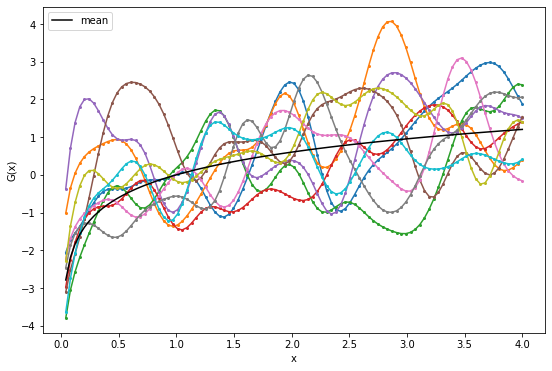

In [9]:
interval = (0,4)
processes_count = 10

generate_and_draw_gaussian(processes_count, interval, rbf_kernel, mean_function_1)

#### Brownian Motion
Brownian motion is a type of Gaussian process in which the change of its value through time completely random.  
A standard Brownian motion as a Gaussian process has zero mean, and kernel $k(s, t) = \min{(s, t)}$
<br>
1. Generate 10 Brownian motions in the interval [0, 1].
2. Draw the processes in a single plot with different colors.

In [10]:
def brownian_kernel(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    cov = np.zeros((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            cov[i][j] = min(x1[i], x2[j])
    return cov

def brownian_mean_function(t):
    return [0 for _ in range(len(t))]

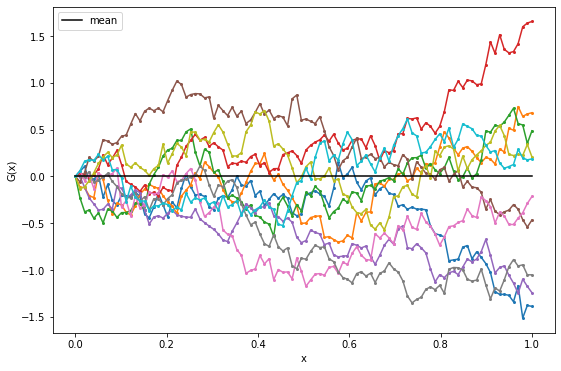

In [11]:
interval = (0,1)
processes_count = 10

generate_and_draw_gaussian(processes_count, interval, brownian_kernel, brownian_mean_function)

As you can see, in the Brownian process, the process gradually moves away from the average value and moves on a new trend.

1. Again generate a Brownian process around zero mean.
2. Apply a linear regression to the above process and by subtracting the data value from this trend, put the mean around zero.
3. This time remove the trend using the ‍‍‍‍**Differencing** method. (these two methods are called **Detrending**)

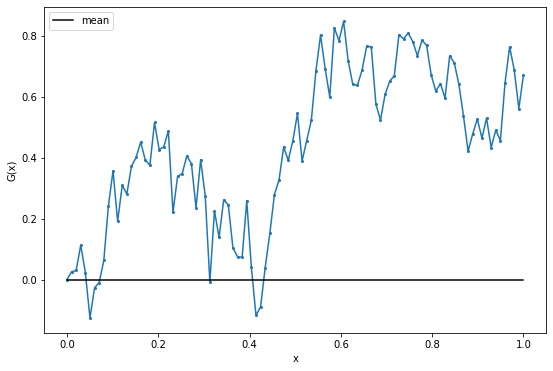

In [32]:
# Generate one gaussian process
X, Y, M = generate_gaussian(1, interval, brownian_kernel, brownian_mean_function)
X = X.reshape(len(X),1)
Y = Y[0].reshape(len(X),1)

draw_gaussian(X, [Y], M)

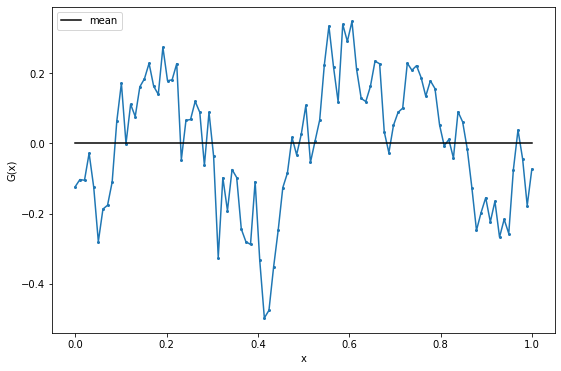

In [33]:
# Detrending using Linear regresion

model = LinearRegression().fit(X, Y)
prediction = model.predict(X)

new_Y = [Y - prediction]
draw_gaussian(X, new_Y, M)

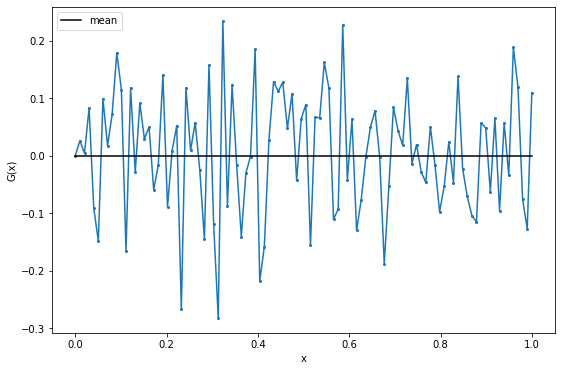

In [34]:
# Detrending using Differencing

new_Y = Y.copy()

for i in range(1, len(Y)):
    new_Y[i] = Y[i] - Y[i-1]
    
draw_gaussian(X, [new_Y], M)    

### Gaussian process with different kernels
In this section, we want to try some other kernels.
Suppose all following processes are Gaussian with zero mean. <br>
1. $k(s, t) = \delta(s-t)$
2. $k_{w, a}(s, t) = \arcsin\left(\frac{w(s-a)(t-a)}{\sqrt{(w(s-a)(s-a)+1)(w(t-a)(t-a)+1)}}\right)$
3. $k_a(s, t) = (s-a)(t-a)$

You should generate 10 processes in the interval [0,1] with each kernel and display them in a plot as before. (each kernel in a separate plot)

In [35]:
interval = (0,1)
processes_count = 10

def mean_function(t):
    return [0 for _ in range(len(t))]

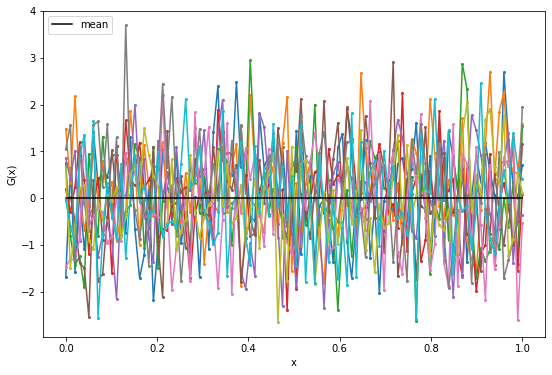

In [36]:
# Kernel 1
def kernel(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    cov = np.zeros((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            s = x1[i]
            t = x2[j]
            cov[i][j] = 1 if s - t == 0 else 0
    return cov

generate_and_draw_gaussian(processes_count, interval, kernel, mean_function)

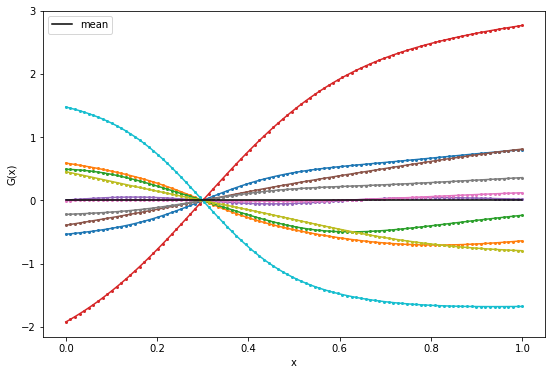

In [37]:
# Kernel 2
w = 10
a = 0.3

def kernel(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    cov = np.zeros((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            s = x1[i]
            t = x2[j]
            cov[i][j] = np.arcsin(w*(s-a)*(t-a)/np.sqrt((w*(s-a)**2+1) * (w*(t-a)**2+1)))
    return cov

generate_and_draw_gaussian(processes_count, interval, kernel, mean_function)

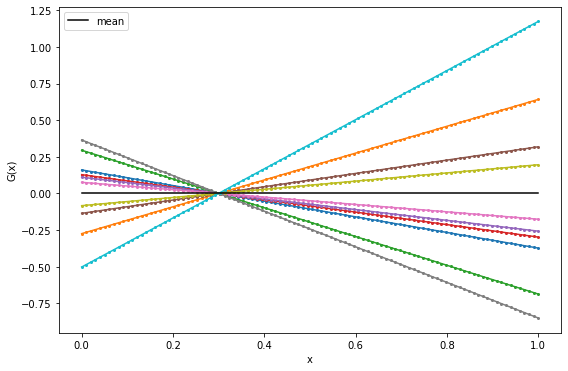

In [38]:
# Kernel 3
a = 0.3

def kernel(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    cov = np.zeros((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            s = x1[i]
            t = x2[j]
            cov[i][j] = (s-a) * (t-a)
    return cov

generate_and_draw_gaussian(processes_count, interval, kernel, mean_function)

## Poisson Process

### Generate Poisson Process

Generate a poisson process with 100 samples. You should draw two plots:
1. The location of the events on the time axis.
2. The graph of the total number of events cumulatively (horizontal axis is again time.)

In [39]:
lmbda = 0.1    #Don't change its value.

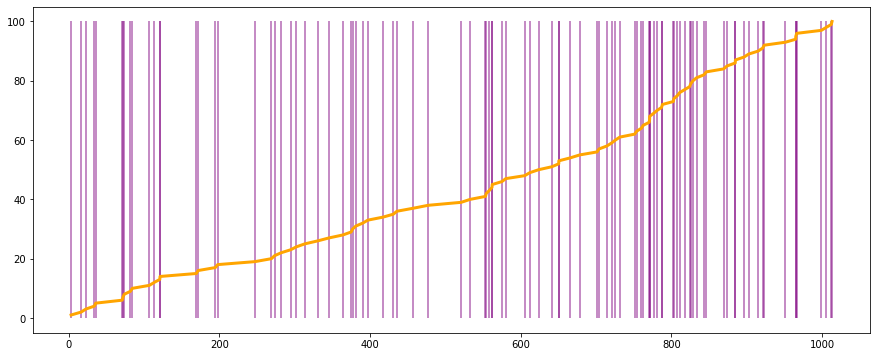

In [44]:
def generate_poisson(lmbda, samples_count=100):
    rate = 1 / lmbda
    x = np.random.exponential(scale=rate, size=samples_count)
    return np.cumsum(x)

def plot_poisson(x, samples_count=100):
    # Plot location of events
    plt.figure(figsize=(15, 6))
    plt.vlines(x, 0, 100, color="purple", alpha=0.6)

    # Plot cumulative number of events
    plt.plot(x, np.cumsum(np.ones(len(x))), color="orange", linewidth=3)

    plt.show()

def generate_and_plot_poisson(lmbda, samples_count=100):
    x = generate_poisson(lmbda, samples_count)
    plot_poisson(x, samples_count)

generate_and_plot_poisson(lmbda, 100)
samples_count = 100

### Expectation of number of samples

1. Generate a poission process consisting of 10000 samples.
2. Sample 1000 random intervals (1000 start points and 1000 end points)
3. Compute number of points in each interval
3. Draw the graph of number of samples w.r.t. interval length
4. Conclude the relationship between expectation of number of samples and interval length.

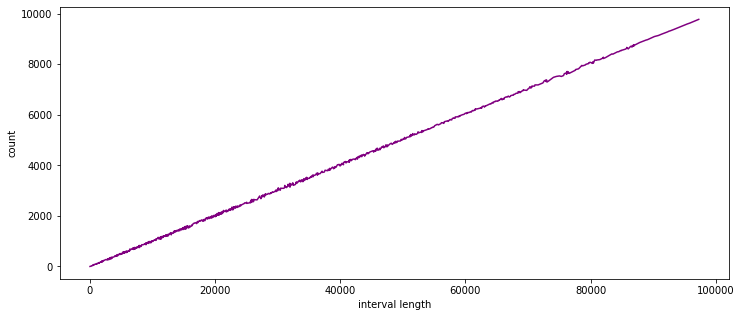

In [45]:
samples_count = 10000

x = generate_poisson(lmbda, samples_count)
range_end = x[-1]
random_intervals = []
for i in range(1000):
    a = np.random.rand() * range_end
    b = np.random.rand() * range_end
    l, r = min(a, b), max(a, b)
    random_intervals.append((l, r))

interval_count = []
for l, r in random_intervals:
    count = np.count_nonzero(x < r) - np.count_nonzero(x < l)
    interval_count.append((r-l, count))

interval_count.sort()
interval_count = np.array(interval_count)

x = interval_count[:,0]
y = interval_count[:,1]
plt.figure(figsize=(12, 5))
plt.plot(x, y, color="purple")
plt.xlabel("interval length")
plt.ylabel("count")
plt.show()

**As we can see on the plot, there is a linear relationship between expectation of number of samples vs interval length.**

### Estimate the pdf
In this section, we want to estimate $\lambda$.
1. Generate a poission process consisting of 10000 samples.
2. For each consecutive interval of length 100 compute the number of samples
3. Estimate the PDF
4. Compute the real PDF (possion distribution)
5. Compare estimated and real distributions in a single graph

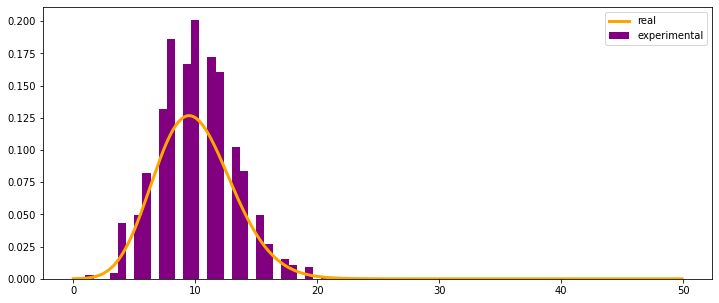

In [47]:
samples_count = 10000
lmbda = 0.1
x = generate_poisson(lmbda, samples_count)
range_end = x[-1]

interval_length = 100

counts = []
for i in range(0, math.ceil(range_end), interval_length):
    l = i
    r = l + interval_length
    count = np.count_nonzero(x < r) - np.count_nonzero(x < l)
    counts.append(count)

plt.figure(figsize=(12, 5))
plt.hist(counts, bins=30, density = True, color="purple", label="experimental")

from scipy.special import factorial

t = np.arange(0, 50, 0.1)
param = interval_length*lmbda
pdf = np.power(param,t) * np.exp(-param)/factorial(t)


plt.plot(t, pdf, color="orange", label="real", linewidth=3)
plt.legend(loc='upper right')

plt.show()

**As we see, the parameter for the distribution is 10 which is equal to lambda*interval_length.**

## Hawkes Process
Besides Gaussian and Poisson, there are many other point processes. In this section, we want to get familiar with another point process named the **Hawkes Process**. <br>
So far, we have learned about the processes in which there is assumption of independence. However, there are other processes in which each event that occurs stochastically at a time $t_i$ adds more intensity to the process and increases the probability of subsequent events. Such processes are called **self-exciting processes**. <br>

Hawkes Process is a self-exciting process. The (univariate) Hawkes process is defined as below:
$$\lambda^*(t) = \mu + \sum_{t_i < t} \varphi(t - t_i)$$

As you can see, it depends linearly on the effects of events that have occurred before time $t$.
Namely, this dependence is through a triggering kernel function $φ(.)$ which is
a function of the delay $t−t_i$ between the current time and the timestamp of the previous event.This function is usually a monotonically decreasing function.<br><br>
The most commonly used kernel function is exponential decay:
$$\varphi(x) = \alpha \beta \exp (-\beta x)$$

In this section, you should
1. Generate a Hawkes Process which its kernel function is exponential decay consisting of 200 samples. [set α=0.1 , β=0.2 , 𝜇=0.1]
2. Try to change values of these 3 variables and find out how they affect the process. (Please write the impact of each.)
3. What kind of real-world processes do you think the Hawkes Process can simulate?

**Note:** In a single figure, plot time of events' occurrences and conditional intensity function ($\lambda^*(t)$)<br>
**Note:** To check the effect of each variable, draw some plots in a separate figures where only that variable has changed. (Your final answer should include three figures.) 

----
**I used the "Ogata’s modified thinning algorithm"[1] mentioned on "Hawkes Processes: Simulation, Estimation, and Validation"[2] for simulating Hawkes process, and I assumed that $\varphi(x) = \alpha \exp (-\beta x)$ (no beta before exponential.)**

[1]: Ogata, Y. (1981). On Lewis' simulation method for point processes. IEEE transactions on information theory, 27(1), 23-31.

[2]: Laub, P. (2014). Hawkes Processes: Simulation, Estimation, and Validation. The University of Queensland. https://pat-laub.github.io/pdfs/honours_thesis.pdf



alpha: 0.1, beta: 0.2, mu: 0.1


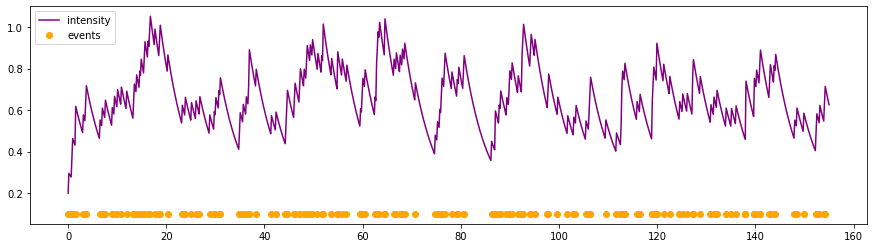

In [48]:
def hawkes_kernel(mu, alpha, beta, x):
    return alpha * np.exp(-beta*x)

def univariate_hawkes(mu, alpha, beta, t, prev_ts):
    h = mu
    for s in prev_ts:
        if s <= t:
            h += hawkes_kernel(mu, alpha, beta, t - s)
    return h
    
def generate_hawkes(mu, alpha, beta, samples_count, max_time=None):
    print(f"alpha: {alpha}, beta: {beta}, mu: {mu}")
    sample_times = [0]
    t = 0
    M = 1
    epsillon = 10e-10
    i = 0
    
    while (not max_time and i < samples_count) or (max_time and t < max_time):
        M = univariate_hawkes(mu, alpha, beta, t+epsillon, sample_times)
        e = np.random.exponential(M)
        t = t + e
        u = np.random.uniform(0, M)
        h = univariate_hawkes(mu, alpha, beta, t, sample_times)
        if u <= h:
            sample_times.append(t)

        i += 1

    sample_times = np.array(sample_times)

    X = np.linspace(0, math.ceil(sample_times[-1]), 1000)
    Y = []
    for x in X:
        y = univariate_hawkes(mu, alpha, beta, x, sample_times)
        Y.append(y)
        
    return sample_times, X, Y

def draw_hawkes(sample_times, X, Y, title=None, color="purple"):
    plt.figure(figsize=(15, 4))
    plt.plot(X, Y, color=color, label="intensity")
    plt.plot(sample_times, mu*np.ones(len(sample_times)), 'o', color="orange", label="events")
    plt.legend(loc="upper left")
    plt.title(title)
    plt.show()

alpha, beta, mu = 0.1, 0.2, 0.1
# alpha, beta, mu = 2, 1.2, 1
samples_count = 200
sample_times, X, Y = generate_hawkes(mu, alpha, beta, samples_count)
draw_hawkes(sample_times, X, Y)

alpha: 0.5, beta: 1, mu: 0.1


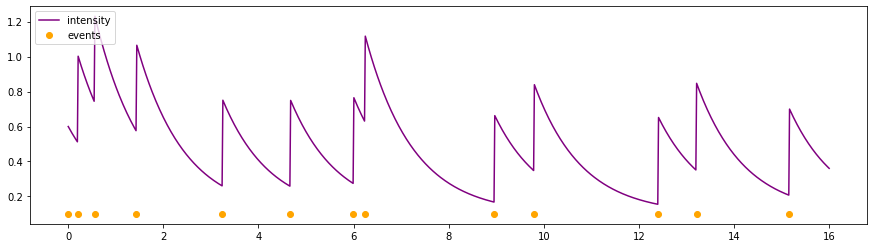

In [24]:
alpha, beta, mu = 0.5, 1, 0.1
samples_count = 20
sample_times, X, Y = generate_hawkes(mu, alpha, beta, samples_count)
draw_hawkes(sample_times, X, Y)

alpha: 0.01, beta: 0.2, mu: 0.1
alpha: 0.1, beta: 0.2, mu: 0.1
alpha: 1, beta: 0.2, mu: 0.1
alpha: 10, beta: 0.2, mu: 0.1


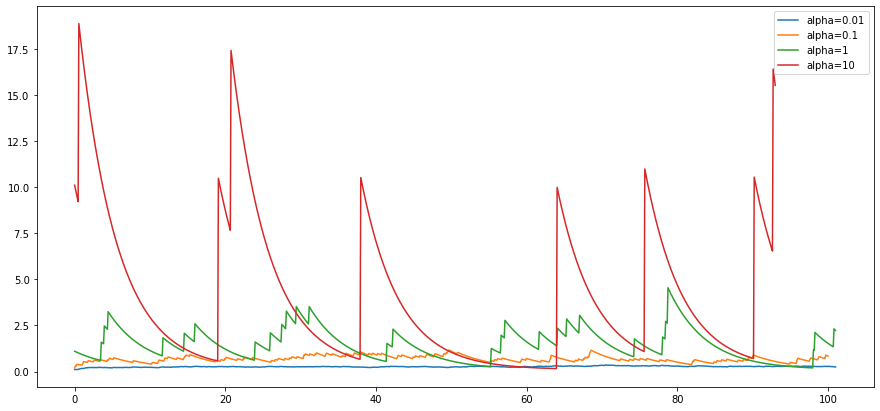

In [25]:
alphas = [0.01, 0.1, 1, 10]

plt.figure(figsize=(15, 7))

for alpha in alphas:
    beta = 0.2
    mu = 0.1
    sample_times, X, Y = generate_hawkes(mu, alpha, beta, samples_count=0, max_time=100)
    plt.plot(X, Y, label=f"alpha={alpha}")
    plt.legend(loc="upper right")

plt.show()

**As we see, increaing alpha will increase the intensity function at times where events happen.**

alpha: 0.1, beta: 0.01, mu: 0.1
alpha: 0.1, beta: 0.05, mu: 0.1
alpha: 0.1, beta: 0.1, mu: 0.1
alpha: 0.1, beta: 0.5, mu: 0.1
alpha: 0.1, beta: 1, mu: 0.1
alpha: 0.1, beta: 5, mu: 0.1


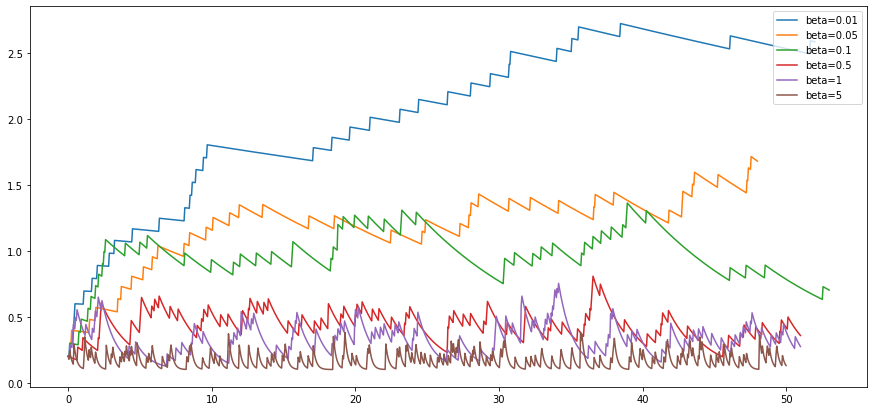

In [26]:
betas = [0.01, 0.05, 0.1, 0.5, 1, 5]

plt.figure(figsize=(15, 7))

for beta in betas:
    alpha = 0.1
    mu = 0.1
    sample_times, X, Y = generate_hawkes(mu, alpha, beta, samples_count=0, max_time=50)
    plt.plot(X, Y, label=f"beta={beta}")
    plt.legend(loc="upper right")
    
plt.show()

**As we see, increaing beta will result in increasing the effect of previous events on current time.**

alpha: 0.1, beta: 0.2, mu: 0.1
alpha: 0.1, beta: 0.2, mu: 0.3
alpha: 0.1, beta: 0.2, mu: 1
alpha: 0.1, beta: 0.2, mu: 3


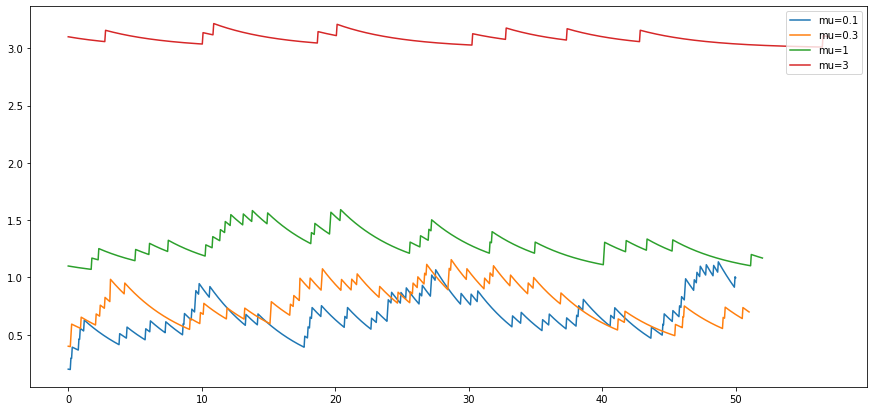

In [27]:
mus = [0.1, 0.3, 1, 3]

plt.figure(figsize=(15, 7))

for mu in mus:
    alpha = 0.1
    beta = 0.2
    sample_times, X, Y = generate_hawkes(mu, alpha, beta, samples_count=0, max_time=50)
    plt.plot(X, Y, label=f"mu={mu}")
    plt.legend(loc="upper right")
    
plt.show()

**The mu function will increase the mean of intensity function to be higher.**

**Example applications:**

**Hawkes process can simulate people's reactions to an event on social media. E.g. when some news related to one celebrity breaks out, there will be many people who simultaneously react to it at the same time, and the number of people will decrease as time goes by, until some other news about the person comes out.**


**It is also useful for modeling seismic events (earthquakes) since when one earthquake happens, there will be more likely for subsequent earthquakes to happen.**